In [42]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_moons
from sklearn.ensemble import BaggingClassifier

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این تمرین، ما قصد داریم تأثیر پارامترهای هایپر در مدل درخت تصمیم را بررسی کنیم و سپس به مقایسه و بررسی مدل‌های درخت تصمیم و یادگیری انبوه (Ensemble Learning) بپردازیم.



<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در ابتدابه بررسی هایپر پارامتر max_depth می‌پردازیم

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
دیتاست Iris یکی از مجموعه‌داده‌های معروف در علم داده است که معمولاً برای مسائل آموزشی  استفاده می‌شود. این دیتاست اطلاعاتی در مورد گل‌های زنبق را در اختیار ما قرار می‌دهد. این دیتاست شامل مشخصات سه گونه مختلف از گل‌های زنبق است:
<ul dir=rtl>
<li dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
Iris setosa
<li dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
Iris virginica
<li dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
Iris versicolor
</ul>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
هر نمونه از این دیتاست شامل چهار ویژگی است:
<ul dir=rtl>
<li dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
طول کاسبرگ (Sepal Length)
<li dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
عرض کاسبرگ (Sepal Width)
<li dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
 طول گلبرگ (Petal Length)
<li dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
عرض گلبرگ (Petal Width)
</ul>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
این ویژگی‌ها به واحد سانتی‌متر اندازه‌گیری شده‌اند. اهمیت این دیتاست از آنجاست که ساختار ساده‌ای دارد و معمولاً به عنوان یک مسئله‌ی معمولی در مسائل آموزشی مورد استفاده قرار می‌گیرد.

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
فرض کنید که شما با استفاده از درخت تصمیم قصد دارید داده‌های آموزشی مربوط به دسته‌بندی گل‌های زنبق را کلاس‌بندی کنید. از دو ویژگی پتال (طول و عرض) برای این کار استفاده می‌کنید. شما دو مدل درخت تصمیم را با اعماق مختلف می‌سازید: یک مدل با `max_depth=2` و`max_depth=3`و`max_depth=5`و`max_depth=10`.
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
با استفاده از تابع plot_decision_boundary چگونگی دسته بندی داده ها را رسم نمایید و سپس توضیح دهید که چگونه اعماق مختلف می‌تواند ساختار درخت تصمیم را تحت تأثیر قرار دهد و تاثیر عمق بر overfit و underfit  را توضیح دهید.




In [43]:
def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

In [44]:
iris = load_iris()

In [45]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split,cross_validate
from pprint import pprint
import warnings
warnings.filterwarnings("ignore")

In [46]:
iris = load_iris()
X = iris.data[:, 2:]
y = iris.target

In [47]:
train_featurs,test_features,train_labels,test_labels=train_test_split(X,y,test_size=0.2,random_state=42)

In [48]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)
results = cross_validate(tree_clf , train_featurs, train_labels, cv = 5, return_train_score=True)
pprint(results)
y_pred = tree_clf.predict(train_featurs)
print(accuracy_score(train_labels, y_pred))
y_pred =tree_clf.predict(test_features)
print(accuracy_score(test_labels, y_pred))

{'fit_time': array([0.00159717, 0.00134063, 0.00163794, 0.00133133, 0.00130367]),
 'score_time': array([0.00136161, 0.00080562, 0.00086284, 0.00083351, 0.00077152]),
 'test_score': array([0.95833333, 0.91666667, 0.83333333, 0.95833333, 0.91666667]),
 'train_score': array([0.94791667, 0.94791667, 0.97916667, 0.94791667, 0.95833333])}
0.95
1.0


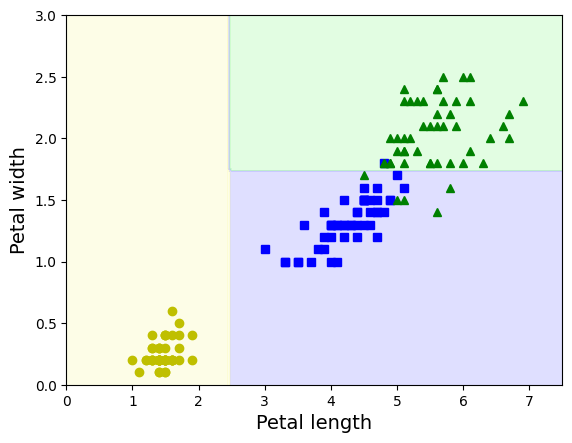

In [49]:
plot_decision_boundary(tree_clf , X,y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True)

In [50]:
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf.fit(X, y)
results = cross_validate(tree_clf , train_featurs, train_labels, cv = 5, return_train_score=True)
pprint(results)
y_pred = tree_clf.predict(train_featurs)
print(accuracy_score(train_labels, y_pred))
y_pred =tree_clf.predict(test_features)
print(accuracy_score(test_labels, y_pred))

{'fit_time': array([0.00148582, 0.00136757, 0.00128412, 0.00132275, 0.00135231]),
 'score_time': array([0.00088668, 0.00078893, 0.0007813 , 0.00075722, 0.00078678]),
 'test_score': array([0.95833333, 1.        , 0.83333333, 0.95833333, 0.91666667]),
 'train_score': array([0.96875   , 0.96875   , 1.        , 0.95833333, 0.95833333])}
0.9666666666666667
1.0


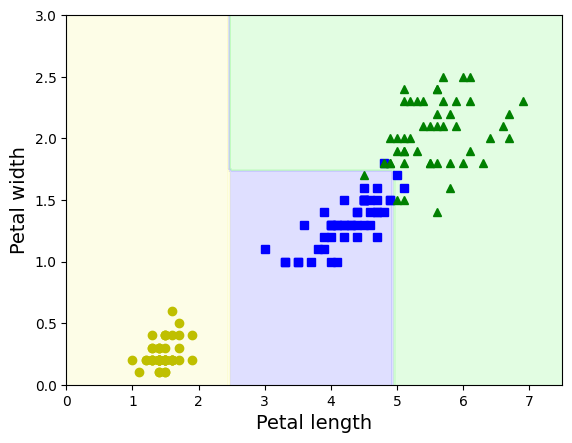

In [51]:
plot_decision_boundary(tree_clf , X,y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True)

In [52]:
tree_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_clf.fit(X, y)
results = cross_validate(tree_clf , train_featurs, train_labels, cv = 5, return_train_score=True)
pprint(results)
y_pred = tree_clf.predict(train_featurs)
print(accuracy_score(train_labels, y_pred))
y_pred =tree_clf.predict(test_features)
print(accuracy_score(test_labels, y_pred))

{'fit_time': array([0.00146866, 0.00127959, 0.00129271, 0.00131106, 0.00094867]),
 'score_time': array([0.00117612, 0.00071764, 0.00081944, 0.00084257, 0.00053263]),
 'test_score': array([0.95833333, 0.91666667, 0.83333333, 0.91666667, 0.91666667]),
 'train_score': array([0.97916667, 0.98958333, 1.        , 0.98958333, 0.97916667])}
0.9916666666666667
1.0


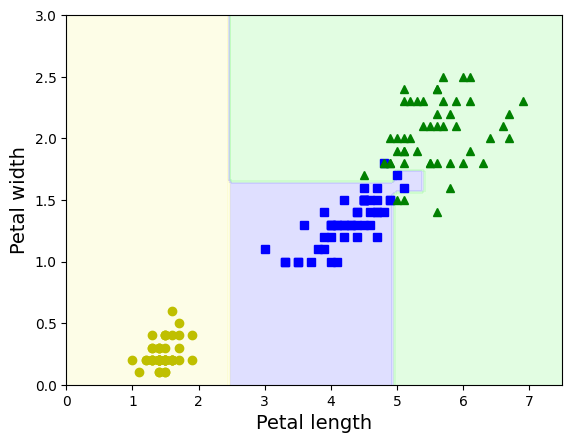

In [53]:
plot_decision_boundary(tree_clf , X,y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True)

In [54]:
tree_clf = DecisionTreeClassifier(max_depth=10, random_state=42)
tree_clf.fit(X, y)
results = cross_validate(tree_clf, train_featurs, train_labels, cv = 5, return_train_score=True)
pprint(results)
y_pred = tree_clf.predict(train_featurs)
print(accuracy_score(train_labels, y_pred))
y_pred =tree_clf.predict(test_features)
print(accuracy_score(test_labels, y_pred))

{'fit_time': array([0.00147653, 0.00130987, 0.00082159, 0.00083542, 0.00082278]),
 'score_time': array([0.00091147, 0.00058103, 0.00052738, 0.0004921 , 0.00047922]),
 'test_score': array([0.95833333, 0.91666667, 0.83333333, 0.91666667, 0.95833333]),
 'train_score': array([0.98958333, 0.98958333, 1.        , 0.98958333, 0.98958333])}
0.9916666666666667
1.0


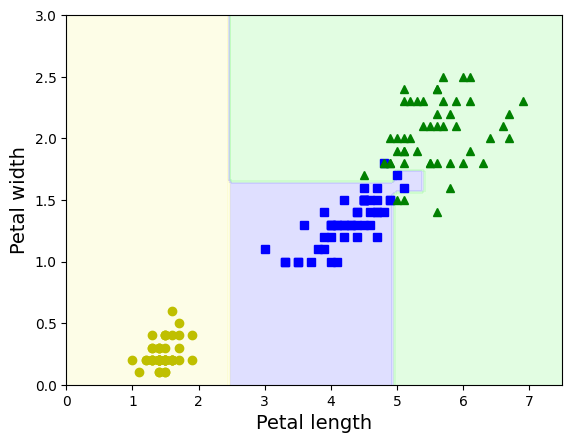

In [55]:
plot_decision_boundary(tree_clf , X,y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True)

برای کنترل پیچیدگی درخت تصمیم باید حداکثر عمقش رو مشخص کنیم. چون شدت رشد به پیچیدگی زیاد ختم میشه، اورفیتینگ رخ میده  و دقت داده های تست پایین میاد.حتی اگه شدت پیچیدگی به شدت پایین بیاد، آندرفیتینگ اتفاق میوفته و داده های آموزشی ما دقت بالایی ندارند.
برای max_depth باید حالتی رو ایجاد کنیم که تعادلی برای رخ ندادن هر دو وضعیت اورفیتینگ و آندرفیتینگ داشته باشه. با توجه به آخرین بخش این تمرین، max_depth 5، میتونه این شرایط رو ایجاد کنه.

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در قسمت بعد می‌خواهیم تأثیر پارامتر min_samples_leaf در مدل درخت تصمیم را بررسی کنیم. این پارامتر نشان دهنده حداقل تعداد نمونه‌هایی است که باید در یک برگ درخت وجود داشته باشد.
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
برای بررسی تاثیر این هایپر پارامتر از تابع make_moon استفاده میکنیم و به صورت رندم داده‌هایی را تولید می‌کنیم. سپس با مقادیر مختلف min_samples_leaf =  [1, 10, 20] و داده‌های تولید شده از make_moon تاثیر آن را بر دسته بندی درخت تصمیم را بررسی می‌کنیم.
مانند قسمت قبل با استفاده از تابع plot_decision_boundary چگونگی دسته بندی داده‌ها را رسم نمایید و سپس تاثیر این هایپر پارامتر را توضیح دهید.

In [56]:
X, y = make_moons(n_samples=300, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
from sklearn.model_selection import GridSearchCV

In [22]:
dtc = DecisionTreeClassifier(min_samples_leaf=1,random_state=42)
dtc .fit(X_train, y_train)
results = cross_validate(dtc  , X_train, y_train, cv = 5, return_train_score=True)
pprint(results)
y_pred =dtc.predict(X_train)
print(accuracy_score(y_train, y_pred))
y_pred =dtc.predict(X_test)
print(accuracy_score(y_test, y_pred))

{'fit_time': array([0.00989413, 0.00160122, 0.00488639, 0.0015204 , 0.01688528]),
 'score_time': array([0.0015409 , 0.00699592, 0.00075364, 0.00072145, 0.00086522]),
 'test_score': array([0.89583333, 0.89583333, 0.83333333, 0.79166667, 0.875     ]),
 'train_score': array([1., 1., 1., 1., 1.])}
1.0
0.85


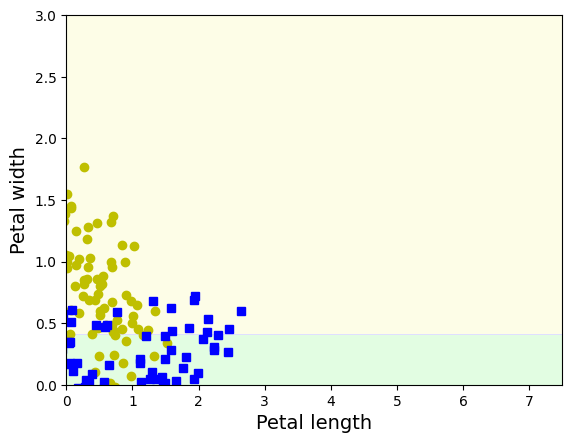

In [58]:
plot_decision_boundary(dtc , X,y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True)

In [59]:
dtc = DecisionTreeClassifier(min_samples_leaf=10,random_state=42)
dtc .fit(X_train, y_train)
results = cross_validate(dtc  , X_train, y_train, cv = 5, return_train_score=True)
pprint(results)
y_pred =dtc.predict(X_train)
print(accuracy_score(y_train, y_pred))
y_pred =dtc.predict(X_test)
print(accuracy_score(y_test, y_pred))

{'fit_time': array([0.00144053, 0.00142694, 0.00135779, 0.00856757, 0.00147247]),
 'score_time': array([0.00375009, 0.00073552, 0.00070095, 0.00082803, 0.00090981]),
 'test_score': array([0.875     , 0.89583333, 0.8125    , 0.875     , 0.85416667]),
 'train_score': array([0.90625   , 0.88541667, 0.90104167, 0.88020833, 0.90104167])}
0.9125
0.9166666666666666


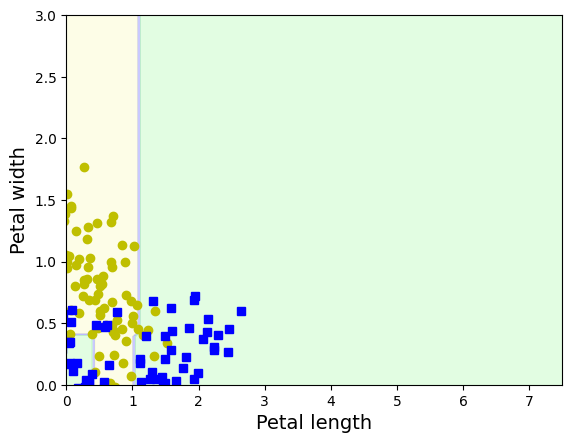

In [60]:
plot_decision_boundary(dtc , X,y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True)

In [61]:
dtc = DecisionTreeClassifier(min_samples_leaf=20,random_state=42)
dtc .fit(X_train, y_train)
results = cross_validate(dtc  , X_train, y_train, cv = 5, return_train_score=True)
pprint(results)
y_pred =dtc.predict(X_train)
print(accuracy_score(y_train, y_pred))
y_pred =dtc.predict(X_test)
print(accuracy_score(y_test, y_pred))

{'fit_time': array([0.00158739, 0.00149918, 0.0014329 , 0.01020455, 0.00147104]),
 'score_time': array([0.00091386, 0.00082517, 0.00076962, 0.00092173, 0.00377679]),
 'test_score': array([0.89583333, 0.85416667, 0.77083333, 0.8125    , 0.8125    ]),
 'train_score': array([0.84375   , 0.859375  , 0.859375  , 0.84895833, 0.83333333])}
0.8666666666666667
0.85


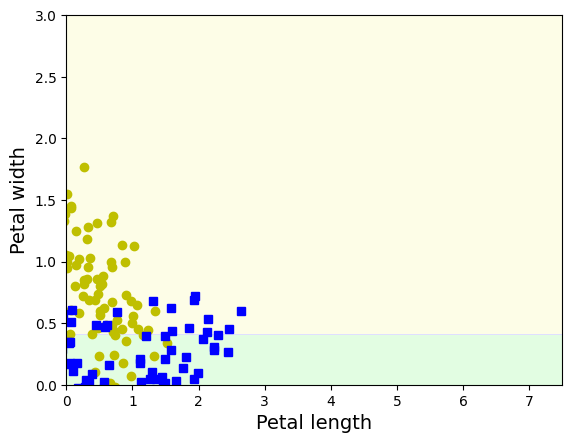

In [62]:
plot_decision_boundary(dtc , X,y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True)

با مشخص کردن مقدار پارامتر min_samples_leaf به طور موثر در جهت جلوگیری از اورفیتینگ اقدام میکنیم.
در واقع این پارامتر برای مشخص کردن حداقل اندازه برگ نمونه هست.
 برگ همون گره انتهایی درخت تصمیم محسوب میشه و هر چقدر که برگ کوچکتر باشه، مدل برای گرفتن نویز و اطلاعاتی که دقت کمتری دارن، مناسب تر میکنه.

 مثلا
 اگه min_sample_leaf روی 1 تنظیم بشه، عمق درخت چندین برابر میشه و درخت بسیار پیچیده میشه، چون سعی می کنه تا جایی که می تونه شاخه ایجاد کنه، حتی اگر یک برگ یک نمونه داشته باشیم.

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در قسمت بعد می‌خواهیم متد Bagging  را با درخت تصمیم با اعماق مختلف مقایسه کنیم.از همان دیتا ست make_moon  استفاده می‌کنیم. درخت های تصمیم با عمق [1, 2, 3, 5, 10] را آموزش دهید و پلات آن‌ها را نیز رسم نمایید.
 سپس از bagging استفاده می‌کنیم. تخمین‌گر bagging  را آخرین درخت قرار دهید
  ، تعداد تخمین‌گر‌ها در سپس متد bagging را برابر 500 عدد قرار دهید و ماکزیمم سمپل را نیز 100 قرار دهید سپس با استفاده از تابع plot_decision_boundary چگونگی دسته بندی داده‌ها را رسم نمایید.  


In [63]:
from sklearn.ensemble import BaggingClassifier

In [64]:
base_cls = DecisionTreeClassifier(max_depth=1,random_state=42)
base_cls.fit(X_train, y_train)
results = cross_validate(base_cls  , X_train, y_train, cv = 5, return_train_score=True)
pprint(results)
y_pred =base_cls.predict(X_train)
print(accuracy_score(y_train, y_pred))
y_pred =base_cls.predict(X_test)
print(accuracy_score(y_test, y_pred))

{'fit_time': array([0.0014751 , 0.00134516, 0.00088239, 0.00080824, 0.00081849]),
 'score_time': array([0.00092411, 0.00069523, 0.00054526, 0.00053334, 0.000489  ]),
 'test_score': array([0.83333333, 0.83333333, 0.77083333, 0.85416667, 0.77083333]),
 'train_score': array([0.8125    , 0.80729167, 0.828125  , 0.80729167, 0.828125  ])}
0.8166666666666667
0.7833333333333333


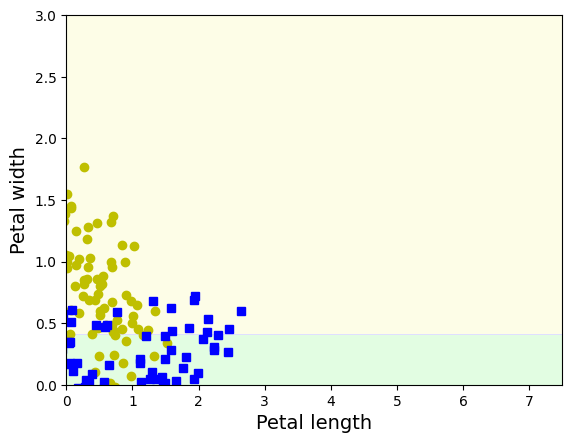

In [65]:
plot_decision_boundary(base_cls , X,y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True)

In [66]:
base_cls = DecisionTreeClassifier(max_depth=2,random_state=42)
base_cls.fit(X_train, y_train)
results = cross_validate(base_cls  , X_train, y_train, cv = 5, return_train_score=True)
pprint(results)
y_pred =base_cls.predict(X_train)
print(accuracy_score(y_train, y_pred))
y_pred =base_cls.predict(X_test)
print(accuracy_score(y_test, y_pred))

{'fit_time': array([0.00159335, 0.00131989, 0.00572991, 0.00131488, 0.00127196]),
 'score_time': array([0.00086069, 0.00072789, 0.000736  , 0.00069904, 0.00070238]),
 'test_score': array([0.91666667, 0.89583333, 0.85416667, 0.875     , 0.91666667]),
 'train_score': array([0.890625  , 0.90104167, 0.91145833, 0.90104167, 0.89583333])}
0.9
0.8833333333333333


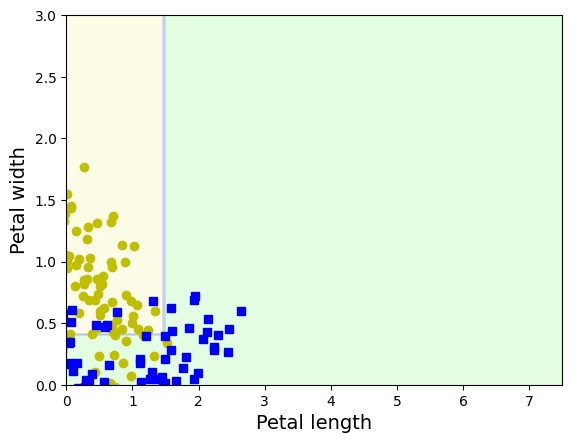

In [67]:
plot_decision_boundary(base_cls , X,y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True)

In [33]:
base_cls = DecisionTreeClassifier(max_depth=3,random_state=42)
base_cls.fit(X_train, y_train)
results = cross_validate(base_cls  , X_train, y_train, cv = 5, return_train_score=True)
pprint(results)
y_pred =base_cls.predict(X_train)
print(accuracy_score(y_train, y_pred))
y_pred =base_cls.predict(X_test)
print(accuracy_score(y_test, y_pred))

{'fit_time': array([0.00179243, 0.00094151, 0.00090957, 0.00090051, 0.00090694]),
 'score_time': array([0.00059652, 0.00056028, 0.00053883, 0.00050545, 0.00049996]),
 'test_score': array([0.91666667, 0.89583333, 0.85416667, 0.875     , 0.91666667]),
 'train_score': array([0.890625  , 0.90104167, 0.91145833, 0.90104167, 0.89583333])}
0.9
0.8833333333333333


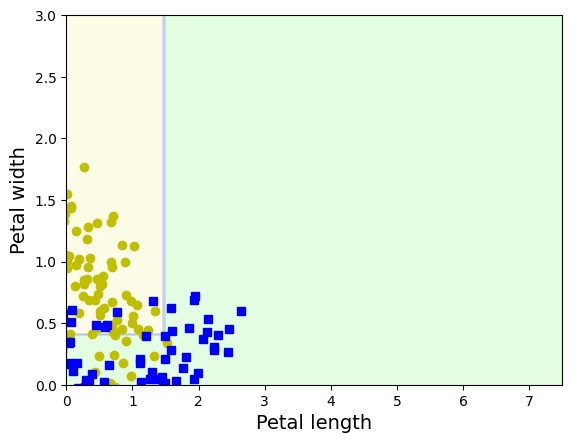

In [69]:
plot_decision_boundary(base_cls , X,y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True)

In [70]:
base_cls = DecisionTreeClassifier(max_depth=5,random_state=42)
base_cls.fit(X_train, y_train)
results = cross_validate(base_cls  , X_train, y_train, cv = 5, return_train_score=True)
pprint(results)
y_pred =base_cls.predict(X_train)
print(accuracy_score(y_train, y_pred))
y_pred =base_cls.predict(X_test)
print(accuracy_score(y_test, y_pred))

{'fit_time': array([0.00164771, 0.00154853, 0.00099993, 0.00099468, 0.00097108]),
 'score_time': array([0.00098062, 0.00059056, 0.00052738, 0.00051618, 0.00058866]),
 'test_score': array([0.91666667, 0.91666667, 0.79166667, 0.875     , 0.91666667]),
 'train_score': array([0.9375    , 0.94270833, 0.93229167, 0.9375    , 0.92708333])}
0.925
0.8333333333333334


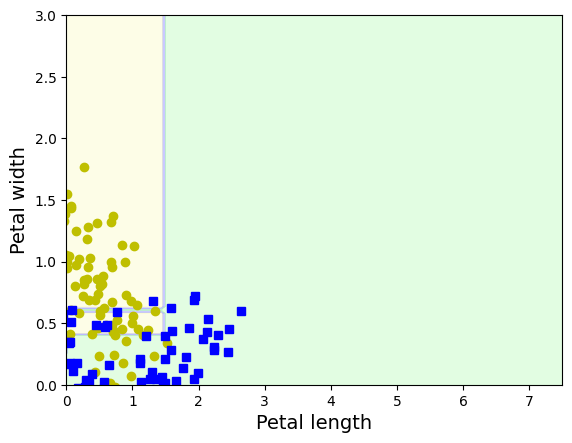

In [71]:
plot_decision_boundary(base_cls , X,y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True)

In [72]:
base_cls_end = DecisionTreeClassifier(max_depth=10,random_state=42)
base_cls_end.fit(X_train, y_train)
results = cross_validate(base_cls_end  , X_train, y_train, cv = 5, return_train_score=True)
pprint(results)
y_pred =base_cls_end.predict(X_train)
print(accuracy_score(y_train, y_pred))
y_pred =base_cls_end.predict(X_test)
print(accuracy_score(y_test, y_pred))

{'fit_time': array([0.00172281, 0.00513887, 0.00156617, 0.00344634, 0.00157118]),
 'score_time': array([0.00099587, 0.00098395, 0.00086379, 0.00078988, 0.00083852]),
 'test_score': array([0.91666667, 0.89583333, 0.83333333, 0.77083333, 0.875     ]),
 'train_score': array([0.99479167, 0.984375  , 1.        , 0.984375  , 0.98958333])}
0.9833333333333333
0.8333333333333334


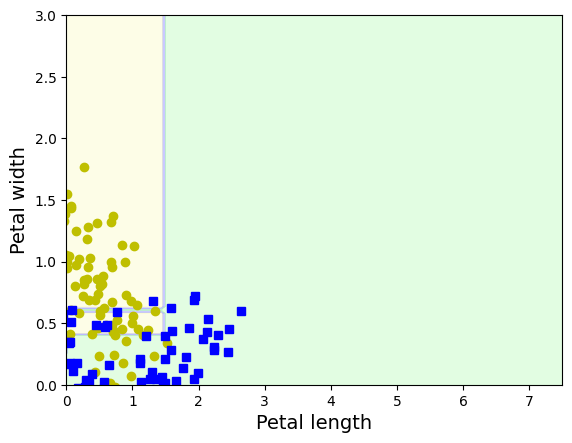

In [73]:
plot_decision_boundary(base_cls , X,y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True)

In [74]:
model = BaggingClassifier(estimator = base_cls_end, max_samples=100,n_estimators=500)
model.fit(X_train, y_train)
results = cross_validate(model  , X_train, y_train, cv = 5, return_train_score=True)
pprint(results)
y_pred =base_cls_end.predict(X_train)
print(accuracy_score(y_train, y_pred))
y_pred =base_cls_end.predict(X_test)
print(accuracy_score(y_test, y_pred))

{'fit_time': array([0.87382913, 0.85106945, 0.84901404, 0.85208535, 0.8693924 ]),
 'score_time': array([0.05012894, 0.04574776, 0.04942799, 0.04657197, 0.05662274]),
 'test_score': array([0.91666667, 0.91666667, 0.875     , 0.91666667, 0.875     ]),
 'train_score': array([0.96354167, 0.95833333, 0.96875   , 0.96354167, 0.95833333])}
0.9833333333333333
0.8333333333333334


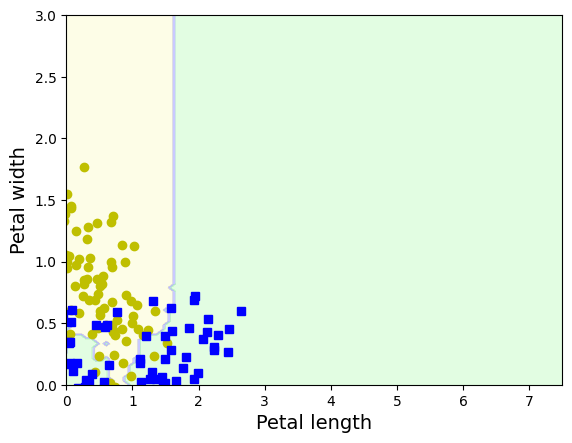

In [75]:
plot_decision_boundary(model , X,y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True)

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
فراموش نکنید که اگرچه که می‌توانیم هایپر پارامترها را سرچ کنیم(مثلا با متد گرید سرچ)اما بهتر است که شهودی از تاثیر آن‌ها بر مدل را داشته باشیم، زیرا درک تاثیر هایپرپارامترها و تاثیر آن‌ها روی یکدیگر به اضافه درک درست از داده‌ها می‌تواند فضای سرچ را کوچک کند در نتیجه هزینه آموزش مدل کاهش میابد.

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
بهینه‌سازی بیزی برای تنظیم ابرپارامترها
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
بهینه‌سازی بیزی یک روش کارآمد برای تنظیم ابرپارامترها است. برخلاف جستجوی شبکه‌ای و جستجوی تصادفی که بیشتر به صورت جستجوی بی‌رحمانه عمل می‌کنند، بهینه‌سازی بیزی مدل احتمالاتی از تابع هدف ایجاد می‌کند و از آن برای انتخاب امیدوارکننده‌ترین ابرپارامترها برای ارزیابی استفاده می‌کند.
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این بخش، از کتابخانه `scikit-optimize` برای انجام بهینه‌سازی بیزی بر روی یک مدل درخت تصمیم استفاده خواهیم کرد.

</font>
</p>



<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این بخش، تابعی برای بهینه‌سازی تعریف می‌کنیم که هایپرپارامترها را به عنوان ورودی دریافت می‌کند، مدل درخت تصمیم را با این پارامترها آموزش می‌دهد و میانگین امتیاز اعتبارسنجی متقابل را برمی‌گرداند.
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در نتیجه یک فضای پارامتری دل خواه برای هایپرپارامتر های max_depth,
min_samples_split,
min_samples_leaf
ایجاد کنید و با استفاده از سه متد
<ul dir=rtl>
<li dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
BayesSearchCV
<li dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
GridSearchCV
<li dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
RandomizedSearchCV
</ul>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
بهترین مقادیر هایپرپارمتر ها را بیابید و در انتها هر کدام از نتایج رااز لحاظ عملکرد و کارآیی محاسباتی تحلیل کنید
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
برای آشنایی با کتابخانه scikit-optimize می توانید به <a href="https://pypi.org/project/scikit-optimize/">اینجا</a> و <a href="https://scikit-optimize.github.io/stable/install.html">اینجا</a> مراجعه کنید.

In [77]:
pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 2.2 MB/s eta 0:00:00


In [78]:
from skopt import BayesSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC

In [79]:
iris = load_iris()
X = iris.data[:, 2:]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
rf_params = { 'max_depth':[2,3,5,10],
              'min_samples_split':[2,4,6,8,10],
              'min_samples_leaf':[1,10,20]}
randomizedsearchcv = RandomizedSearchCV(DecisionTreeClassifier(), rf_params, cv=5, n_iter=100, random_state=42, n_jobs=-1)
randomizedsearchcv .fit(X_train,y_train)
results = cross_validate(randomizedsearchcv  , X_train, y_train, cv = 5, return_train_score=True)
pprint(results)
y_pred = randomizedsearchcv .predict(X_train)
print(accuracy_score(y_train, y_pred))
y_pred = randomizedsearchcv .predict(X_test)
print(accuracy_score(y_test, y_pred))
print( randomizedsearchcv.best_params_)

{'fit_time': array([0.60275483, 0.71152711, 0.68772221, 0.56999779, 0.39277482]),
 'score_time': array([0.00092888, 0.00090599, 0.00091052, 0.00067806, 0.0006063 ]),
 'test_score': array([0.95833333, 1.        , 0.83333333, 0.91666667, 0.91666667]),
 'train_score': array([0.96875   , 0.96875   , 1.        , 0.98958333, 0.95833333])}
0.9833333333333333
1.0
{'min_samples_split': 6, 'min_samples_leaf': 1, 'max_depth': 5}


مقدار min_samples_split در حالت عادی 2 هست و من تصمیم گرفتم که دوتا دوتا مقدارش رو رنج دهی کنم. این پارامتر مشخص میکنه که حداقل تعداد تقسیم هر گره چطوری باشه. از نگاهی دیگه، این پارامتر برای منظم کردن درخت و کمترین نمونه های لازم برای گره برگ هست که اینجا توی هایپرپارامتری که بهمون میده، این مقدار 6 در نظر گرفته شده.

برای هایپرپارامتر max_depth هم یه رنج دادم بهش که نه بیشترین رو انتخاب کرد و نه کمترین. دقیقا اون عدد 5 رو انتخاب کرد.  2 و 3 رو انتخاب نکرد، چون خیلی کوچیک بود و 10 هم خیلی بزرگ میشد و آندرفیتینگ اتفاق می افتاد.

با تعداد گره برگ 1 هم به بهترین نتیجه رسیده، برای خودم شک برانگیزه که چرا یک رو انتخاب کرده، چون اینطوری اورفیتینگ با احتمال زیادی رخ میده.

نتایج هایپر پارامتر برای gridsearchcv , randomizedsearchcv شبیه به هم هست.

جستجوی gridsearchcv میتونه تعداد زیادی از هایپرپارامترها را جستجو کنه، اما با افزایش تعداد فراپارامترها میتونه از نظر محاسباتی گران بشه. اینجا چون تعداد پارامترها کم هست، از نظر عملکردی شبیه به  randomizedsearchcv هست.

در کا برای جستجوی تصادفی میتونیم تعداد بیشتری از فراپارامترها را بدون گرانی محاسباتی در نظر بگیریم، چون به‌طور تصادفی از فراپارامترها نمونه‌برداری می‌کنه.

In [88]:
model=DecisionTreeClassifier()
rf_params = { 'max_depth':[2,3,5,10],
              'min_samples_split':[2,4,6,8,10],
              'min_samples_leaf':[1,10,20]}

gridSearchcv = GridSearchCV(model, rf_params ,cv=5)
gridSearchcv .fit(X_train,y_train)
results = cross_validate(gridSearchcv   , X_train, y_train, cv = 5, return_train_score=True)
pprint(results)
y_pred = gridSearchcv  .predict(X_train)
print(accuracy_score(y_train, y_pred))
y_pred = gridSearchcv  .predict(X_test)
print(accuracy_score(y_test, y_pred))
print( gridSearchcv.best_params_)

{'fit_time': array([0.69024801, 0.9349966 , 0.42599463, 0.43729186, 0.40392947]),
 'score_time': array([0.00080371, 0.00085926, 0.00050926, 0.00049758, 0.00051618]),
 'test_score': array([0.95833333, 0.91666667, 0.83333333, 0.91666667, 0.91666667]),
 'train_score': array([0.96875   , 0.98958333, 1.        , 0.98958333, 0.95833333])}
0.9833333333333333
1.0
{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 6}


In [89]:
rf_params = { 'max_depth':[2,3,5,10],
              'min_samples_split':[2,4,6,8,10],
              'min_samples_leaf':[1,10,20]}
b1 = BayesSearchCV(DecisionTreeClassifier(), rf_params, cv=5, n_iter=10, random_state=42, n_jobs=-1)
b1 .fit(X_train,y_train)
results = cross_validate(b1   , X_train, y_train, cv = 5, return_train_score=True)
pprint(results)
y_pred = b1  .predict(X_train)
print(accuracy_score(y_train, y_pred))
y_pred = b1  .predict(X_test)
print(accuracy_score(y_test, y_pred))
print( b1.best_params_)

{'fit_time': array([1.90710998, 1.41826344, 1.08926344, 0.78656673, 0.79633379]),
 'score_time': array([0.00559473, 0.00092077, 0.00321555, 0.00085831, 0.0008471 ]),
 'test_score': array([0.95833333, 1.        , 0.83333333, 0.95833333, 0.91666667]),
 'train_score': array([0.96875   , 0.97916667, 1.        , 0.96875   , 0.95833333])}
0.9833333333333333
1.0
OrderedDict([('max_depth', 10), ('min_samples_leaf', 1), ('min_samples_split', 6)])


توی BayesSearchCV از بهینه سازی بیضی استفاده میشه که تا حدودی شبیه به gridsearch , randomizedsearch هست.
اما روش بهینه سازیش متفاوته.
انتظار داشتم که نتایج هایپرپارامترش شبیه به دوتای دیگه باشه ، اما برای max_depth
بیشترین مقدار ممکن رو در نظر گرفته که خب اگه روی داده های واقعی تست، نتیجه دقت مون هم خوب باشه، میتونیم بهش اعتماد کنیم.
در کل، اینطوری فهمیدم که این روش از دو روش قبلی، چند درجه ای بهتره.

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<b>سلول جواب‌ساز</b>
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    برای ساخته‌شدن فایل <code>result.zip</code> سلول زیر را اجرا کنید. توجه داشته باشید که پیش از اجرای سلول زیر تغییرات اعمال شده در نت‌بوک را ذخیره کرده باشید (<code>ctrl+s</code>) تا در صورت نیاز به پشتیبانی امکان بررسی کد شما وجود داشته باشد.
</font>
</p>

In [91]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [92]:
import zipfile
import joblib

def compress(file_names):
    print("File Paths:")
    print(file_names)
    compression = zipfile.ZIP_DEFLATED
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            zf.write('./' + file_name, file_name, compress_type=compression)


file_names = ['Decision_Trees.ipynb']
compress(file_names)

File Paths:
['Decision_Trees.ipynb']
